In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country, 
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | fasa
Processing Record 4 of Set 1 | sabang
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | arman
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | ostersund
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | bathsheba
Processing Record 18 of Set 1 | tubruq
City not found. Skipping...
Processing Record 19 of Set 1 | havoysund
Processing Record 20 of Set 1 | bilma
Processing Record 21 of Set 1 | nishihara
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Set 1 

Processing Record 39 of Set 4 | nizhniy odes
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | inhambane
Processing Record 43 of Set 4 | bowen
Processing Record 44 of Set 4 | dharchula
Processing Record 45 of Set 4 | chardara
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | zhoucheng
Processing Record 48 of Set 4 | clermont
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | albion
Processing Record 1 of Set 5 | wysokie mazowieckie
Processing Record 2 of Set 5 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 3 of Set 5 | chulman
Processing Record 4 of Set 5 | royan
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | poum
Processing Record 7 of Set 5 | goderich
Processing Record 8 of Set 5 | aleksandrov gay
Processing Record 9 of Set 5 | arraial do cabo
Processing Record 10 of Set 5 | banepa
Processing Record 11 of Set 5 | paamiut

Processing Record 29 of Set 8 | bloemfontein
Processing Record 30 of Set 8 | bulaevo
Processing Record 31 of Set 8 | dhidhdhoo
Processing Record 32 of Set 8 | saskylakh
Processing Record 33 of Set 8 | nantucket
Processing Record 34 of Set 8 | mirador
Processing Record 35 of Set 8 | lianran
Processing Record 36 of Set 8 | boissevain
Processing Record 37 of Set 8 | aginskoye
Processing Record 38 of Set 8 | cintalapa
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | coral springs
Processing Record 41 of Set 8 | palenque
Processing Record 42 of Set 8 | bluffton
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | kamenka
Processing Record 45 of Set 8 | augusta
Processing Record 46 of Set 8 | povenets
Processing Record 47 of Set 8 | hereford
Processing Record 48 of Set 8 | sao miguel
Processing Record 49 of Set 8 | bereda
Processing Record 50 of Set 8 | encruzilhada do sul
Processing Record 1 of Set 9 | male
Processing Record 2 of Set 9 | ambon
Processing

Processing Record 19 of Set 12 | vestbygda
City not found. Skipping...
Processing Record 20 of Set 12 | costinesti
Processing Record 21 of Set 12 | humaita
Processing Record 22 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 23 of Set 12 | port macquarie
Processing Record 24 of Set 12 | hastinapur
Processing Record 25 of Set 12 | angoche
Processing Record 26 of Set 12 | tengzhou
Processing Record 27 of Set 12 | kamaishi
Processing Record 28 of Set 12 | akyab
Processing Record 29 of Set 12 | helong
Processing Record 30 of Set 12 | hondo
Processing Record 31 of Set 12 | wodonga
Processing Record 32 of Set 12 | ust-barguzin
Processing Record 33 of Set 12 | la union
Processing Record 34 of Set 12 | saint george
Processing Record 35 of Set 12 | misratah
Processing Record 36 of Set 12 | kholtoson
Processing Record 37 of Set 12 | general bravo
Processing Record 38 of Set 12 | lichuan
Processing Record 39 of Set 12 | san vicente
Processing Record 40 of Set 12 | kamenskoye
Cit

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,44.80,73,100,14.99,NZ,2022-08-03 17:11:49
1,Cidreira,-30.1811,-50.2056,65.82,83,73,19.66,BR,2022-08-03 17:11:49
2,Fasa,28.9383,53.6482,87.64,24,1,5.39,IR,2022-08-03 17:11:50
3,Sabang,5.8933,95.3214,81.30,74,100,23.78,ID,2022-08-03 17:11:50
4,Busselton,-33.6500,115.3333,53.69,76,87,17.60,AU,2022-08-03 17:11:50
...,...,...,...,...,...,...,...,...,...
556,Manoel Urbano,-8.8389,-69.2597,94.98,38,45,2.80,BR,2022-08-03 17:27:36
557,Sorland,67.6670,12.6934,57.06,85,100,4.34,NO,2022-08-03 17:27:37
558,Banes,20.9625,-75.7186,86.56,59,15,13.33,CU,2022-08-03 17:27:37
559,Quatre Cocos,-20.2078,57.7625,69.91,70,33,12.95,MU,2022-08-03 17:24:55


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-08-03 17:11:49,-46.6000,168.3333,44.80,73,100,14.99
1,Cidreira,BR,2022-08-03 17:11:49,-30.1811,-50.2056,65.82,83,73,19.66
2,Fasa,IR,2022-08-03 17:11:50,28.9383,53.6482,87.64,24,1,5.39
3,Sabang,ID,2022-08-03 17:11:50,5.8933,95.3214,81.30,74,100,23.78
4,Busselton,AU,2022-08-03 17:11:50,-33.6500,115.3333,53.69,76,87,17.60


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

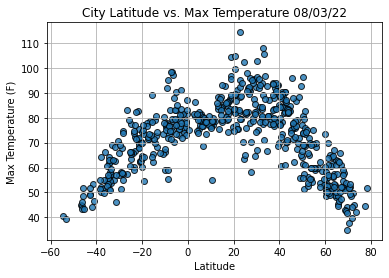

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

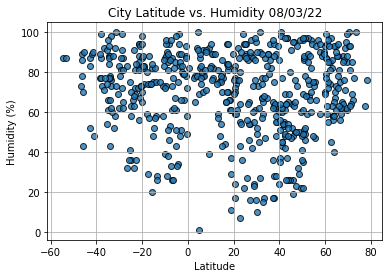

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

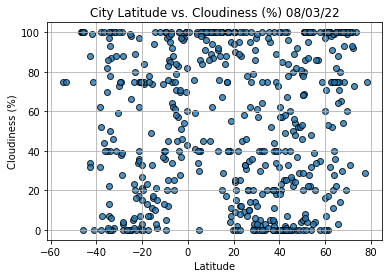

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

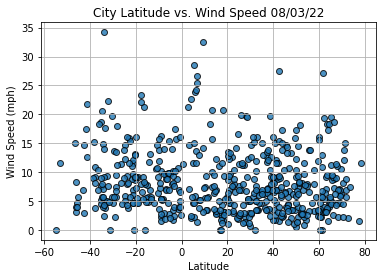

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
index13

City                      Kavieng
Country                        PG
Date          2022-08-03 17:11:54
Lat                       -2.5744
Lng                      150.7967
Max Temp                     81.1
Humidity                       80
Cloudiness                     97
Wind Speed                  15.73
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

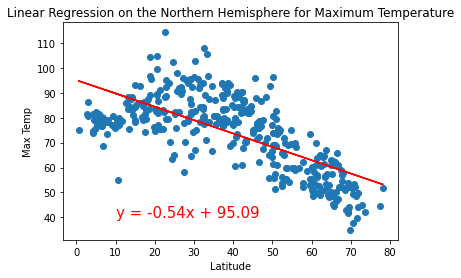

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
 for Maximum Temperature', 'Max Temp',(10,40))

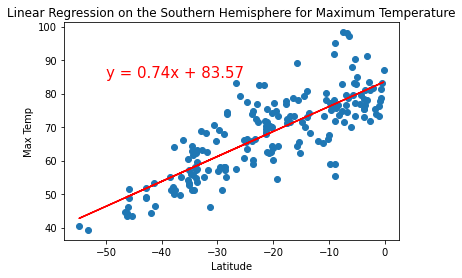

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

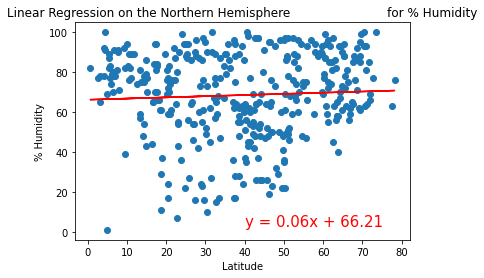

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,3))

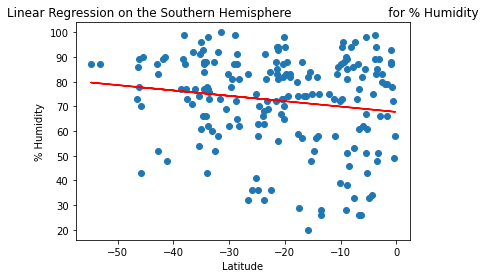

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

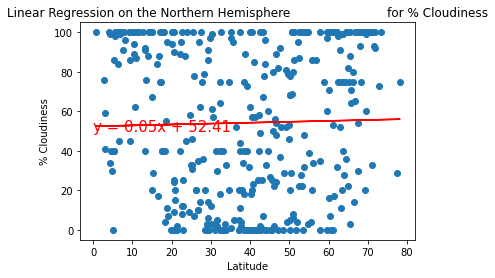

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,50))

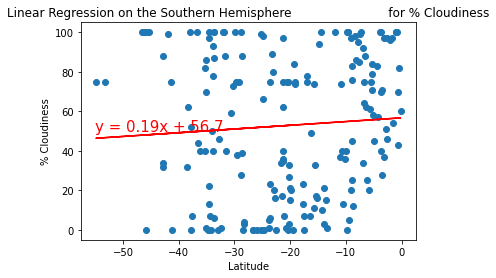

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

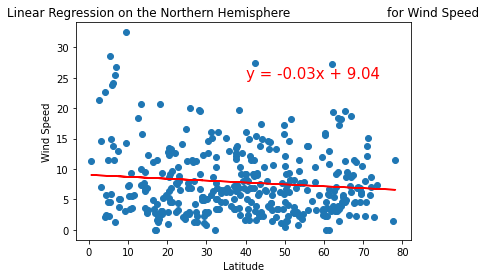

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

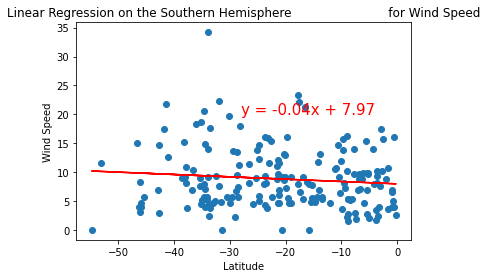

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-28,20))